In [14]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import math
import pylab as pl
from sklearn.metrics import silhouette_samples, silhouette_score

In [5]:
LiquorData = pd.read_csv("2017-2018Liquor.csv")

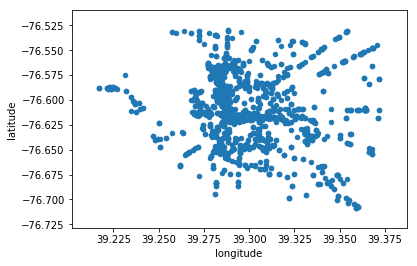

In [75]:
# now that the data is down to a more reasonable size, we can plot it to look for possible arrangements of clusters
# first, cast the coordinates as numeric columns
LiquorData['longitude'] = pd.to_numeric(LiquorData['longitude'])
LiquorData['latitude'] = pd.to_numeric(LiquorData['latitude'])
# now plot
LiquorData.plot.scatter(x='longitude', y='latitude')

In [6]:
XY = {'long': LiquorData['longitude'], 'lat': LiquorData['latitude']}
XY = pd.DataFrame(data=XY)

In [7]:
matrix = XY.values
# Using sklearn
km = KMeans(n_clusters=5)
km.fit(matrix)
# Get cluster assignment labels
labels = km.labels_
# Format results as a DataFrame
results = pd.DataFrame([XY.index,labels]).T

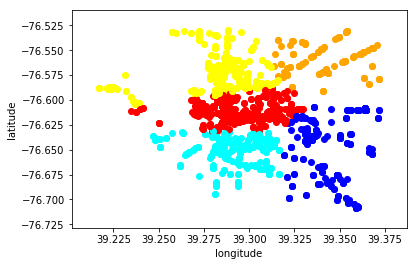

In [78]:
colors = ['red', 'yellow', 'blue', 'orange', 'cyan', 'purple', 'pink']
cplt =LiquorData.plot.scatter(x='longitude', y='latitude', color='white')
for index, row in results.iterrows():
    cplt.plot(XY.iloc[index]['long'], XY.iloc[index]['lat'], "or", color=colors[row[1]])

### Looks interesting. With 5 clusters, the centers appear to be arranged in the middle of the city, North, Northeast, Southeast, and South of the city's center. Let's see if we make more clusters without overfitting.

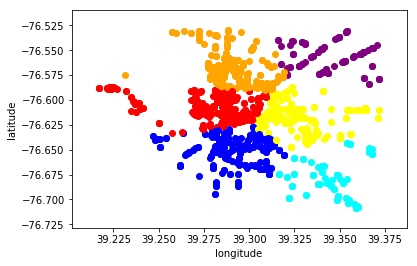

In [79]:
# Using sklearn
km = KMeans(n_clusters=6)
km.fit(matrix)
# Get cluster assignment labels
labels = km.labels_
# Format results as a DataFrame
results = pd.DataFrame([XY.index,labels]).T

cplt =LiquorData.plot.scatter(x='longitude', y='latitude', color='white')
for index, row in results.iterrows():
    cplt.plot(XY.iloc[index]['long'], XY.iloc[index]['lat'], "or", color=colors[row[1]])

### Looks a little better. We'll try one more

In [80]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(matrix)
    Sum_of_squared_distances.append(km.inertia_)


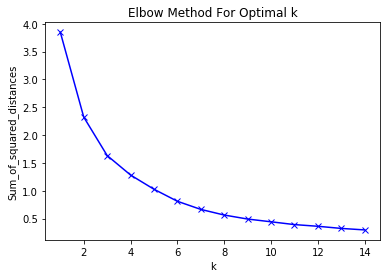

In [81]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
#k value of 7 seems good per elbow method

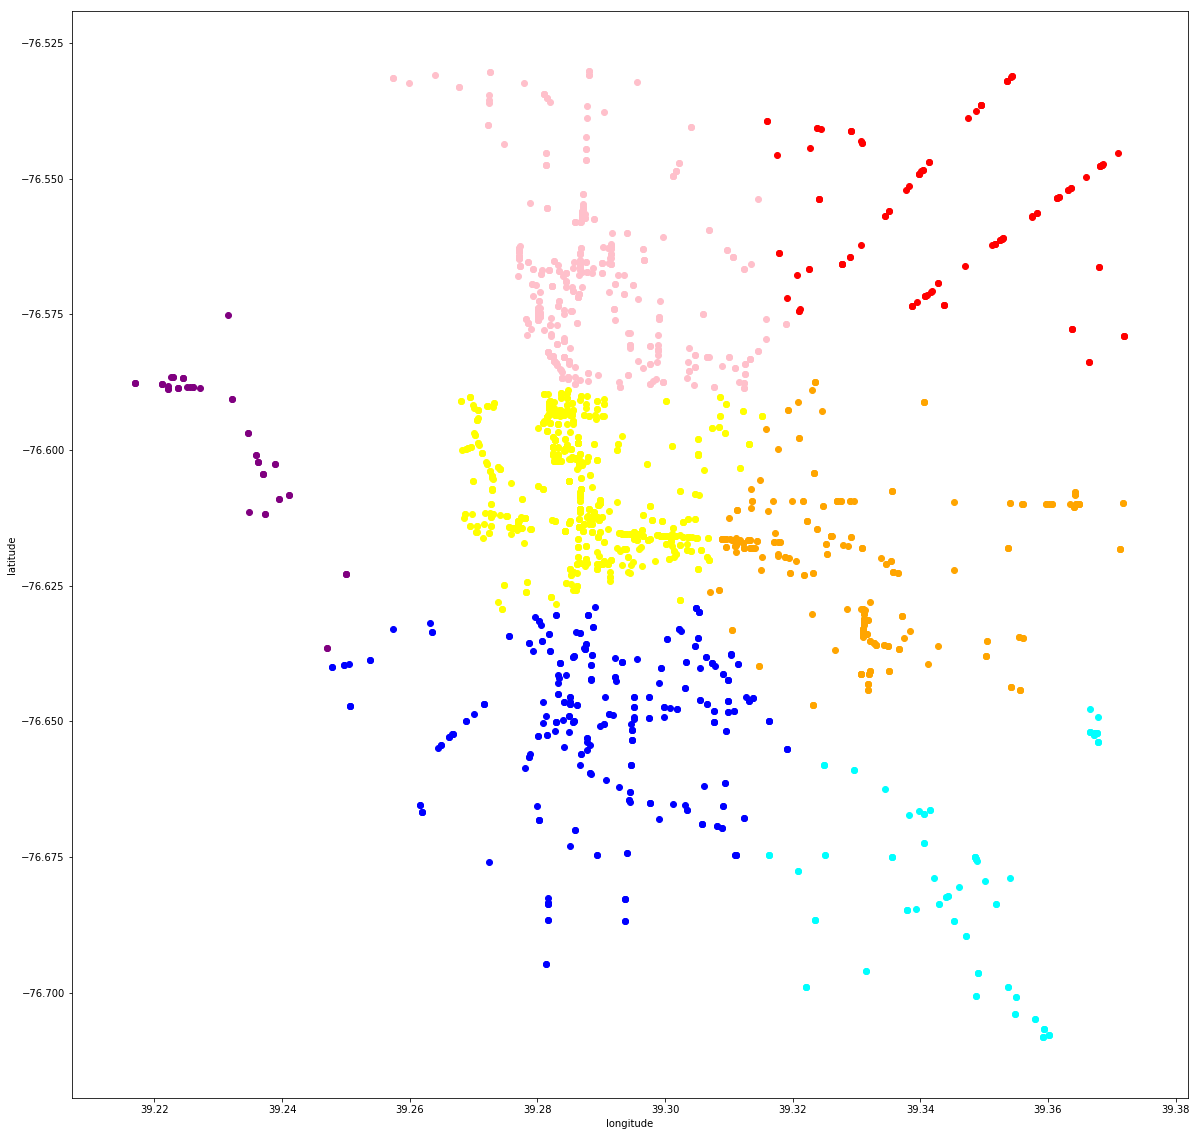

In [82]:
# Using sklearn
km = KMeans(n_clusters=7)
km.fit(matrix)
# Get cluster assignment labels
labels = km.labels_
# Format results as a DataFrame
results = pd.DataFrame([XY.index,labels]).T
cplt=LiquorData.plot.scatter(x='longitude', y='latitude', c='white',linewidth=0, figsize=(20,20))
for index, row in results.iterrows():
    cplt.plot(XY.iloc[index]['long'], XY.iloc[index]['lat'], "or", color=colors[row[1]])

### If 7 clusters looks satisfactory, let's examine the cluster centers so they can be compared to the ones from emergency call data later on.

In [83]:
#This is so we can look at prevalance of liquor in each cluster and match that up with the centroid. 
#can match colors list from earlier to the numeric values of results. 
results[1].value_counts()

1    815
6    399
2    302
3    282
0    116
4    101
5     50
Name: 1, dtype: int64

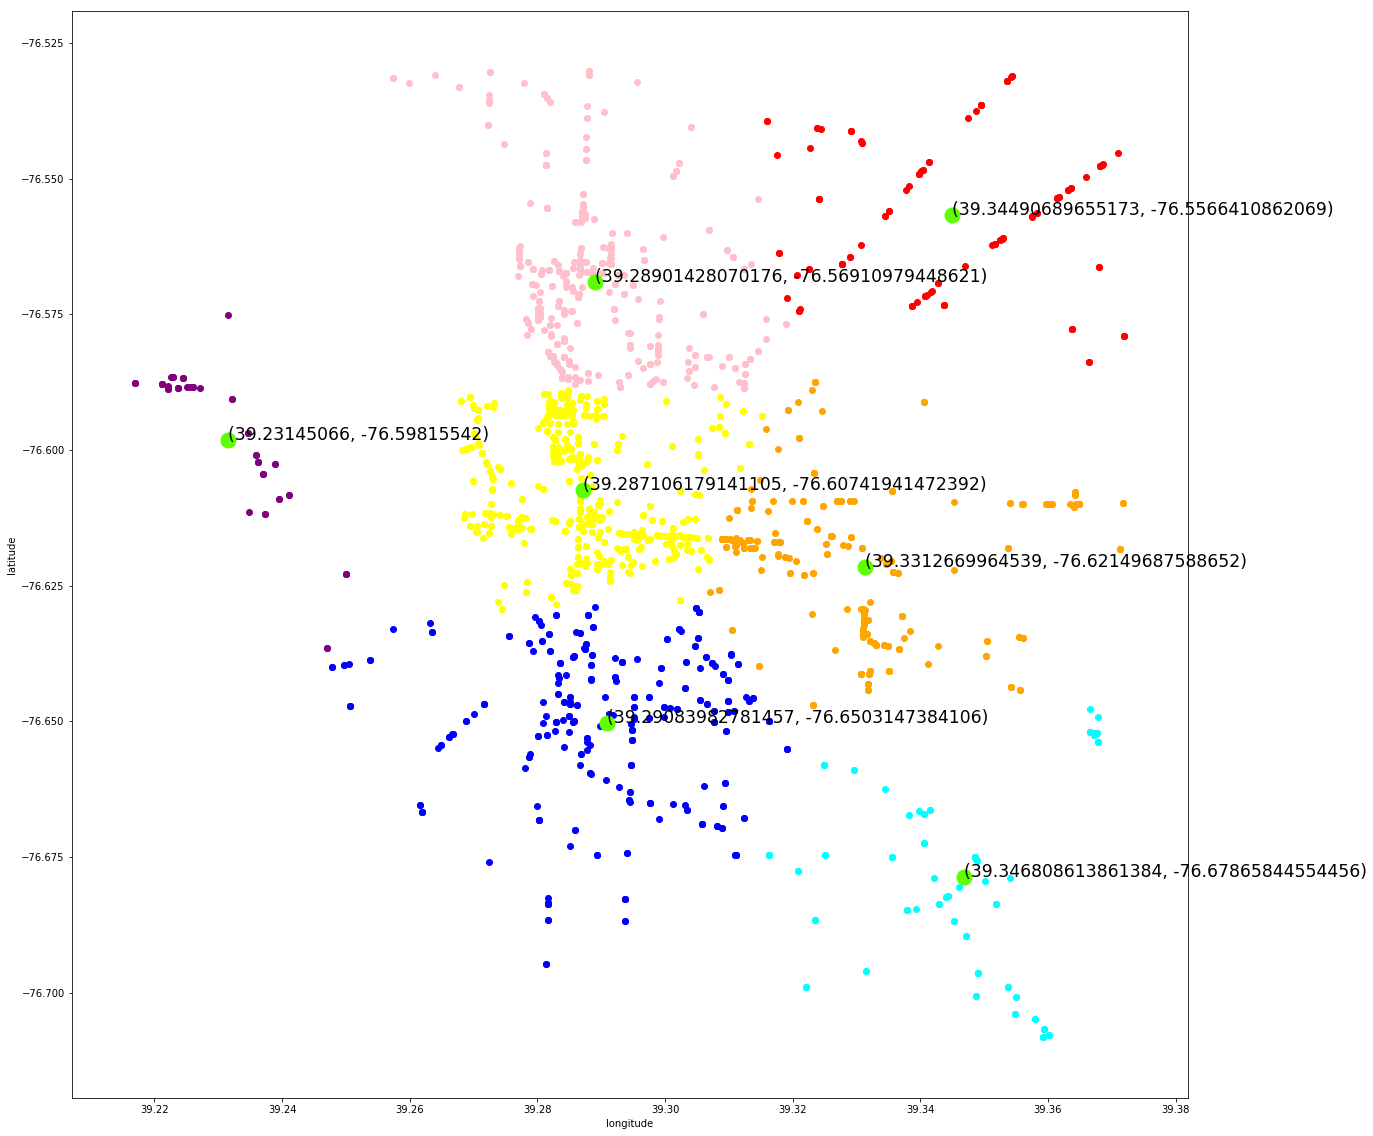

In [84]:
#plot centroids with coordinates
centers = km.cluster_centers_
for center in centers:
    cplt.plot(center[0], center[1], "or", color='#5dff00', markersize=15)
font0 = FontProperties()
font0.set_size('xx-large')
for centroid in centers:
    i_x=centroid[0]
    i_y=centroid[1]
    cplt.text(i_x,i_y, '({}, {})'.format(i_x, i_y), fontproperties=font0)
cplt.figure


In [85]:
#this is in case numbers are illegible on the plot above
print(centers)

[[ 39.3449069  -76.55664109]
 [ 39.28710618 -76.60741941]
 [ 39.29083983 -76.65031474]
 [ 39.331267   -76.62149688]
 [ 39.34680861 -76.67865845]
 [ 39.23145066 -76.59815542]
 [ 39.28901428 -76.56910979]]


In [8]:
long = XY['lat']
lat = XY['long']
maxLong = max(long)
minLong = min(long)
maxLat = max(lat)
minLat = min(lat)

## Now pull in the smoothed Crime Data

In [9]:
CrimeData = pd.read_csv("2017-2018Crime.csv")
CrimeLocs = {'latitude': CrimeData['longitude'], 'longitude': CrimeData['latitude']}
CrimeLocs = pd.DataFrame(data=CrimeLocs)
CrimeLocs.head()

,latitude,longitude
0,39.242372,-76.607879
1,39.301589,-76.656323
2,39.325374,-76.537346
3,39.299922,-76.630205
4,39.363092,-76.609962


## Apply same boundaries to this data as the liquor data above

In [88]:
print(len(CrimeLocs))

734112


In [89]:
CrimeLocs = CrimeLocs[CrimeLocs['latitude'] > minLat]
len(CrimeLocs)

716391

In [90]:
CrimeLocs = CrimeLocs[CrimeLocs['longitude'] > minLong]
len(CrimeLocs)

703580

In [91]:
CrimeLocs = CrimeLocs[CrimeLocs['latitude'] < maxLat]
len(CrimeLocs)

698641

In [92]:
CrimeLocs = CrimeLocs[CrimeLocs['longitude'] < maxLong]
len(CrimeLocs)

695302

## Try plotting

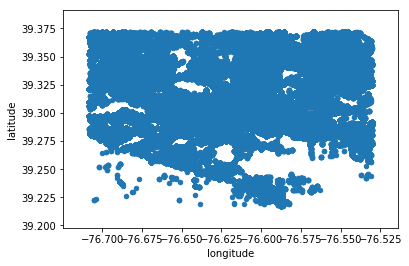

In [93]:
CrimeLocs.plot.scatter(x='longitude', y='latitude')

## Too much data. Take a random sample to get a similar number of points to the liquor data

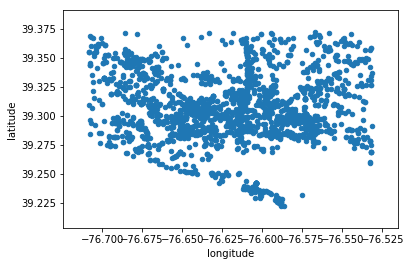

In [94]:
CrimeLocs =CrimeLocs.sample(frac=0.003, replace=False, random_state=1)
CrimeLocs.plot.scatter(x='longitude', y='latitude')

## This is more manageable. Time to cluster with same k as liquor data above

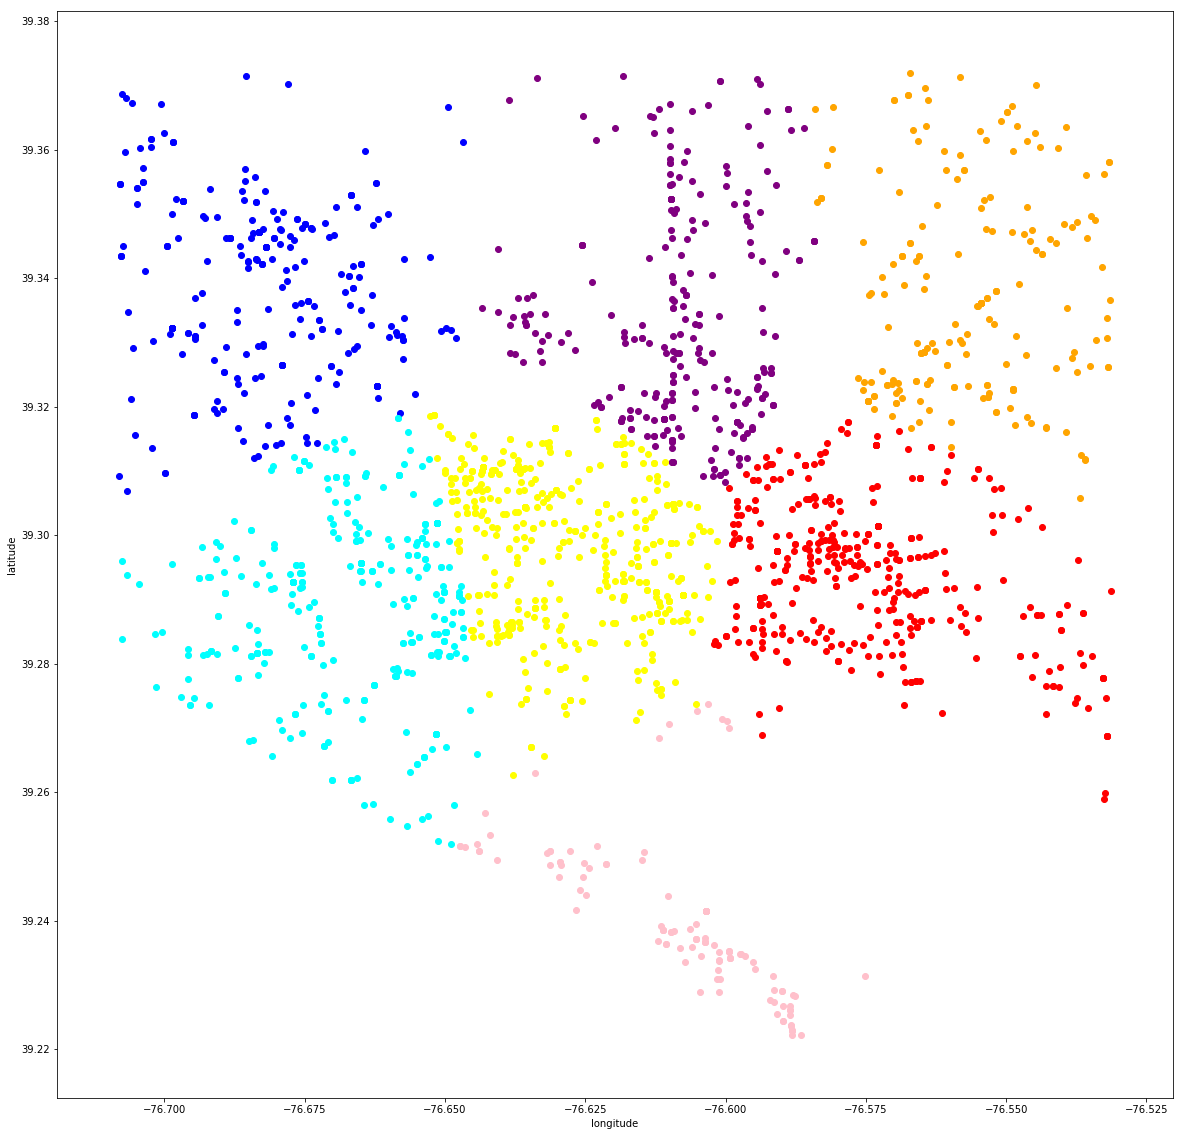

In [95]:
# Using sklearn
matrix = CrimeLocs.values
km = KMeans(n_clusters=7)
km.fit(matrix)
# Get cluster assignment labels
labels = km.labels_
# Format results as a DataFrame
results = pd.DataFrame([CrimeLocs.index,labels]).T
cplt=CrimeLocs.plot.scatter(x='longitude', y='latitude', c='white',linewidth=0, figsize=(20,20))
for index, row in results.iterrows():
    cplt.plot(CrimeLocs.iloc[index]['longitude'], CrimeLocs.iloc[index]['latitude'], "or", color=colors[row[1]])
    

## Show the cluster centers

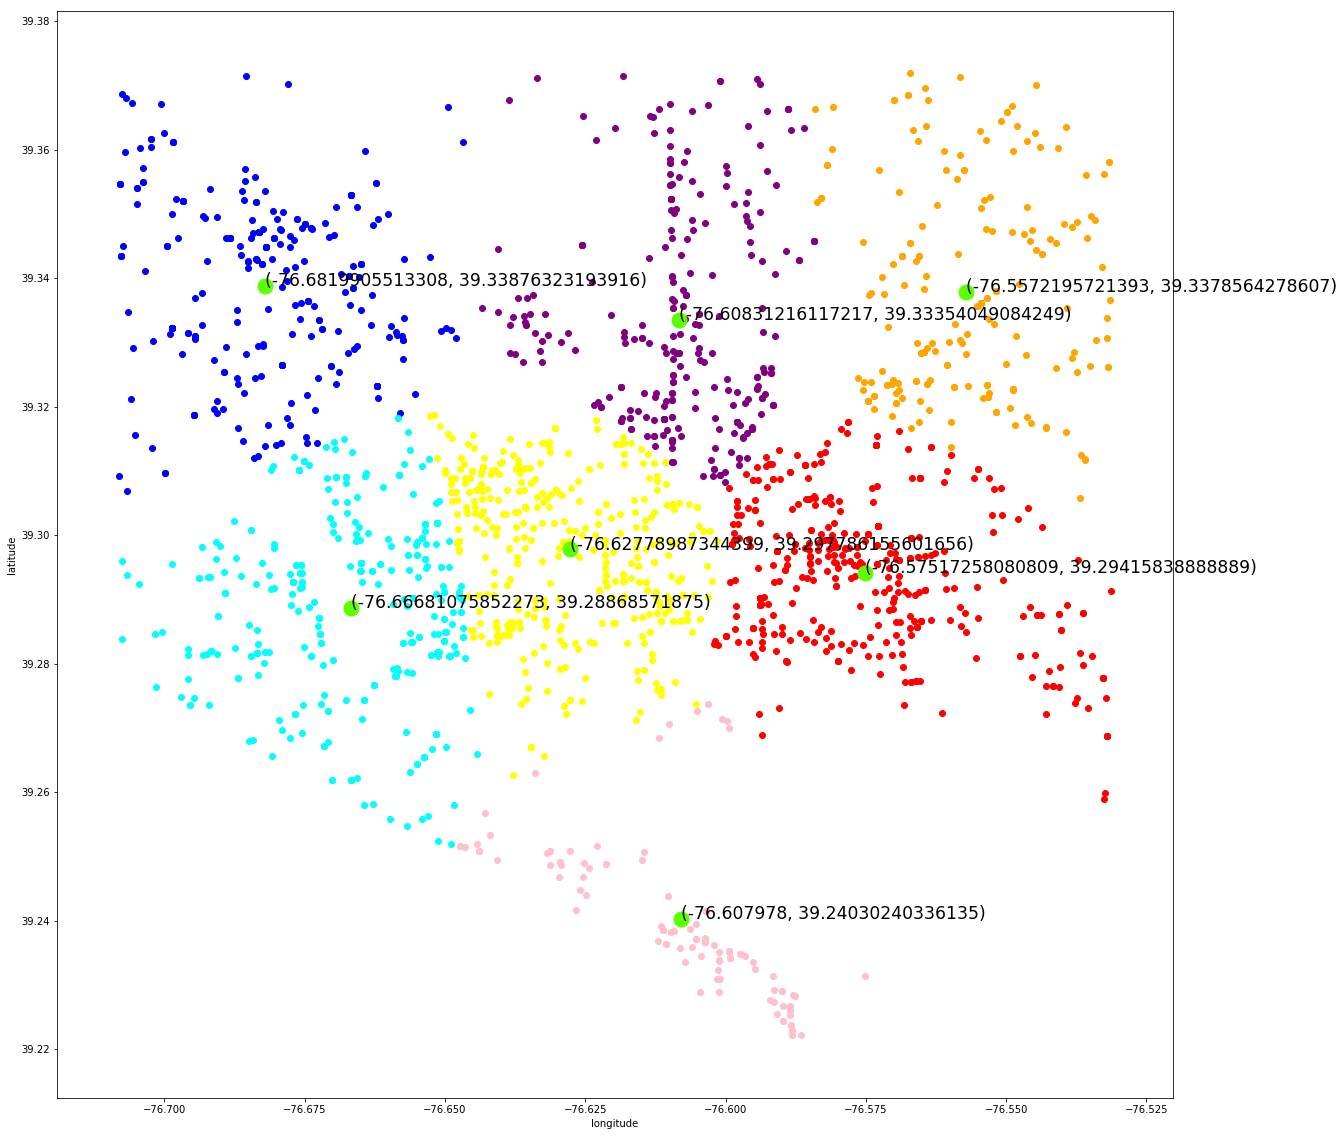

In [96]:
#plot centroids with coordinates
crimeCenters = km.cluster_centers_
for center in crimeCenters:
    cplt.plot(center[1], center[0], "or", color='#5dff00', markersize=15)
font0 = FontProperties()
font0.set_size('xx-large')
for centroid in crimeCenters:
    i_x=centroid[1]
    i_y=centroid[0]
    cplt.text(i_x,i_y, '({}, {})'.format(i_x, i_y), fontproperties=font0)
cplt.figure

In [97]:
liquorCenters = centers
liquorCenters

array([[ 39.3449069 , -76.55664109],
       [ 39.28710618, -76.60741941],
       [ 39.29083983, -76.65031474],
       [ 39.331267  , -76.62149688],
       [ 39.34680861, -76.67865845],
       [ 39.23145066, -76.59815542],
       [ 39.28901428, -76.56910979]])

In [98]:
crimeCenters

array([[ 39.29415839, -76.57517258],
       [ 39.29778616, -76.62778987],
       [ 39.33876323, -76.68199055],
       [ 39.33785643, -76.55721957],
       [ 39.28868572, -76.66681076],
       [ 39.33354049, -76.60831216],
       [ 39.2403024 , -76.607978  ]])

## Show the distances between closest centers from each data set

In [99]:
minDistance = []
for center in liquorCenters:
    minDist = 9999.0
    for c in crimeCenters:
        dist = math.sqrt( (c[1] - center[1])**2 + (c[0] - center[0])**2 )
        if dist < minDist:
            minDist = dist
    minDistance.append(minDist)
minDistance

[0.0070741610624260095,
 0.02300038011998599,
 0.016636071212934367,
 0.013379292912329229,
 0.00870810537632264,
 0.013222573062443668,
 0.007951051944595385]

## Plot cluster centers next to each other

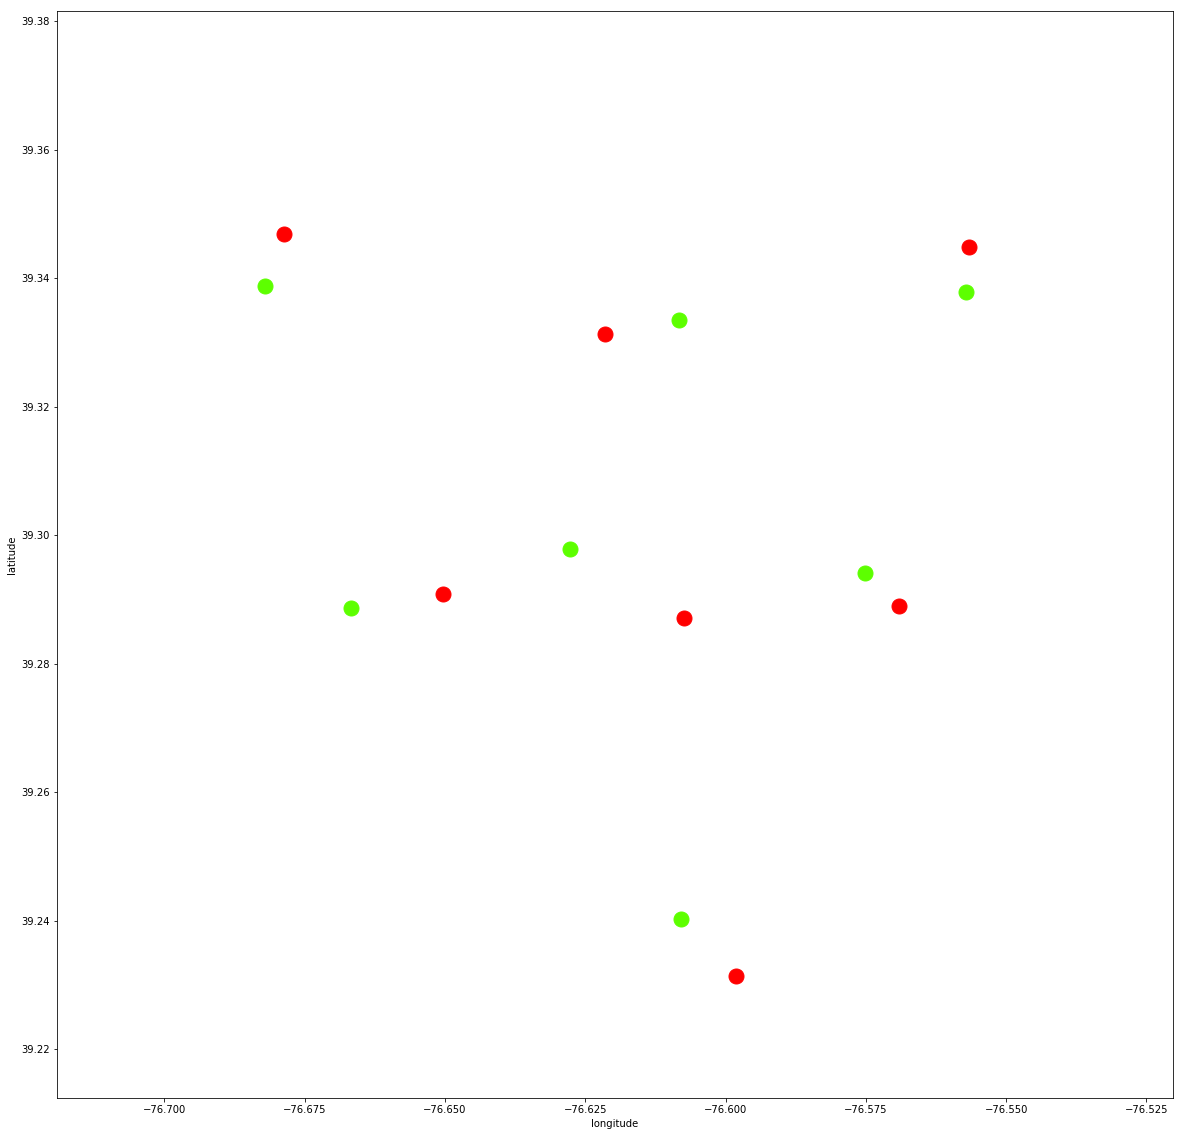

In [100]:
cplt=CrimeLocs.plot.scatter(x='longitude', y='latitude', c='white',linewidth=0, figsize=(20,20))
for center in crimeCenters:
    cplt.plot(center[1], center[0], "or", color='#5dff00', markersize=15)
for center in liquorCenters:
    cplt.plot(center[1], center[0], "or", color='red', markersize=15)

In [101]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(matrix)
    Sum_of_squared_distances.append(km.inertia_)

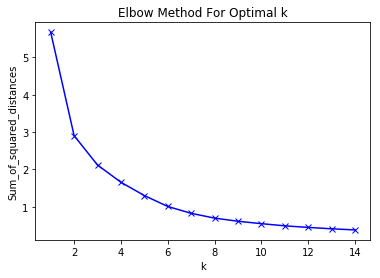

In [102]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#just to doublecheck and yeah 7 is a decent value for the crime sample if it's restricted in this way. clustering looks fine. 

In [10]:
CrimeDataFixLongLat = {'latitude': CrimeData['longitude'], 'longitude': CrimeData['latitude']}
CrimeDataFixLongLat = pd.DataFrame(data=CrimeDataFixLongLat)


In [11]:
CrimeDataFixLongLat = CrimeDataFixLongLat[CrimeDataFixLongLat['latitude'] >= minLat]
CrimeDataFixLongLat = CrimeDataFixLongLat[CrimeDataFixLongLat['longitude'] >= minLong]
CrimeDataFixLongLat = CrimeDataFixLongLat[CrimeDataFixLongLat['latitude'] <= maxLat]
CrimeDataFixLongLat = CrimeDataFixLongLat[CrimeDataFixLongLat['longitude'] <= maxLong]

In [12]:
print(len(CrimeDataFixLongLat))

695302


In [106]:
matrix = CrimeDataFixLongLat.values
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(matrix)
    Sum_of_squared_distances.append(km.inertia_)

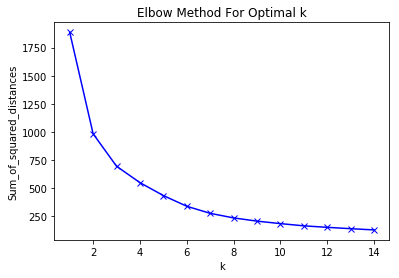

In [107]:
#trying with all crime data not just a sample. 
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
#once again seems cluster of size 7 is actually fine for all data cleaned this way.
#Notice this is not the right way to clean data but I can use maryland state boundaries for long/lat 
#and IQR for outliers to get similar results. I will do that later. 

In [108]:
# Using sklearn
matrix = CrimeDataFixLongLat.values
km = KMeans(n_clusters=7)
km.fit(matrix)
# Get cluster assignment labels
labels = km.labels_
# Format results as a DataFrame
results = pd.DataFrame([CrimeDataFixLongLat.index,labels]).T
results[1].value_counts()

#Printing the amount of crime in each cluster

0    156431
3    134705
5    124759
4     88909
6     85325
1     65049
2     40124
Name: 1, dtype: int64

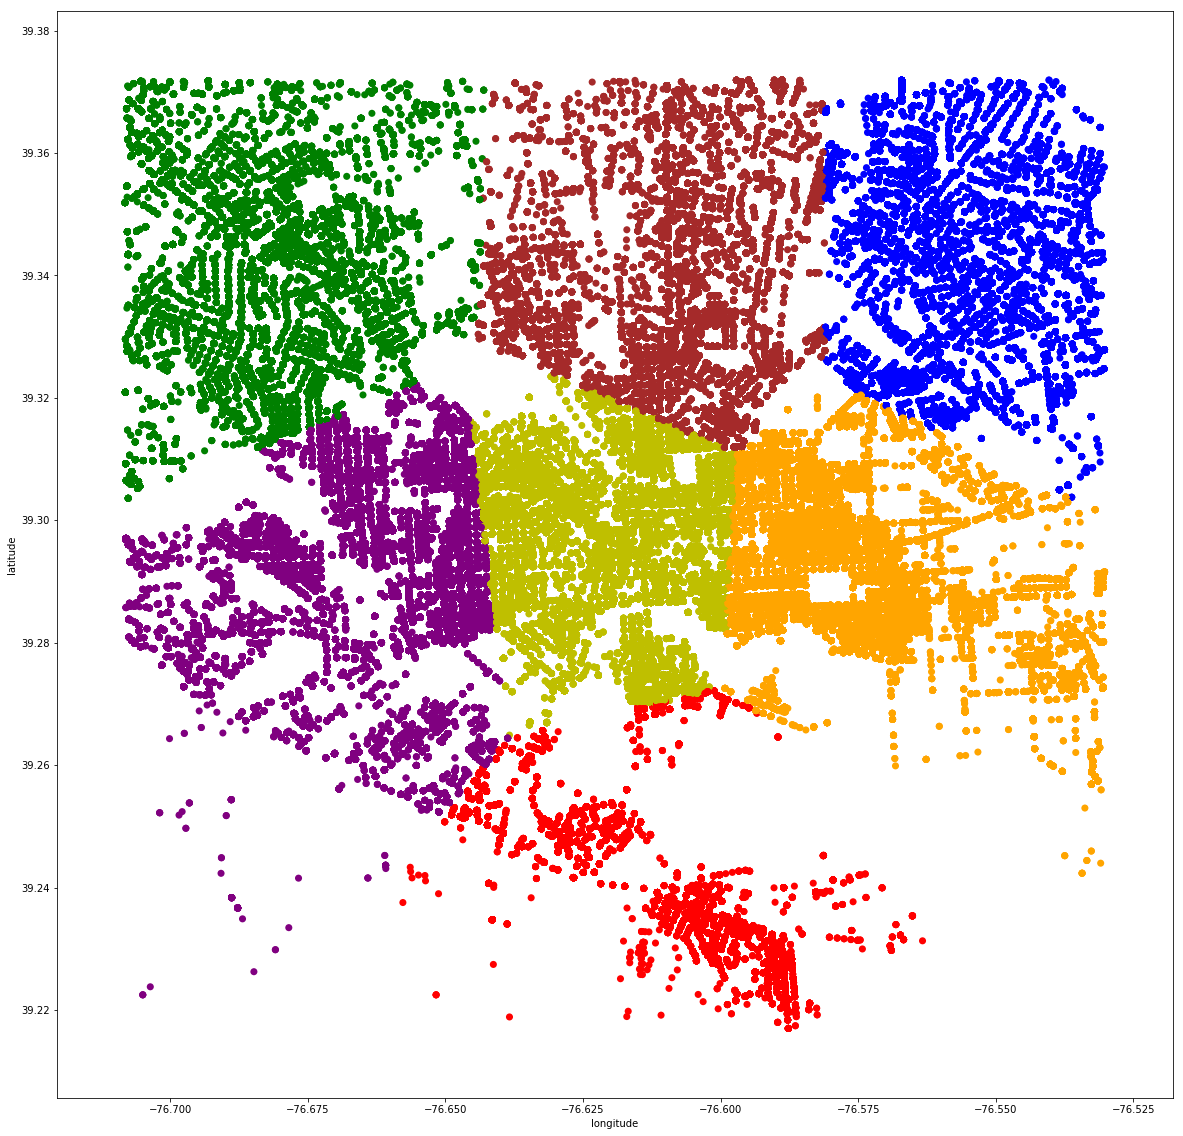

In [109]:
res=results[1]
col = np.where(res==0,'y',np.where(res==1,'b',np.where(res==2,'r',
np.where(res==3,'purple',np.where(res==4,'green',np.where(res==5,'orange','brown'))))))
crimePlot= CrimeDataFixLongLat.plot.scatter(x='longitude', y='latitude', c=col, s=50, linewidth=0, figsize=(20,20))

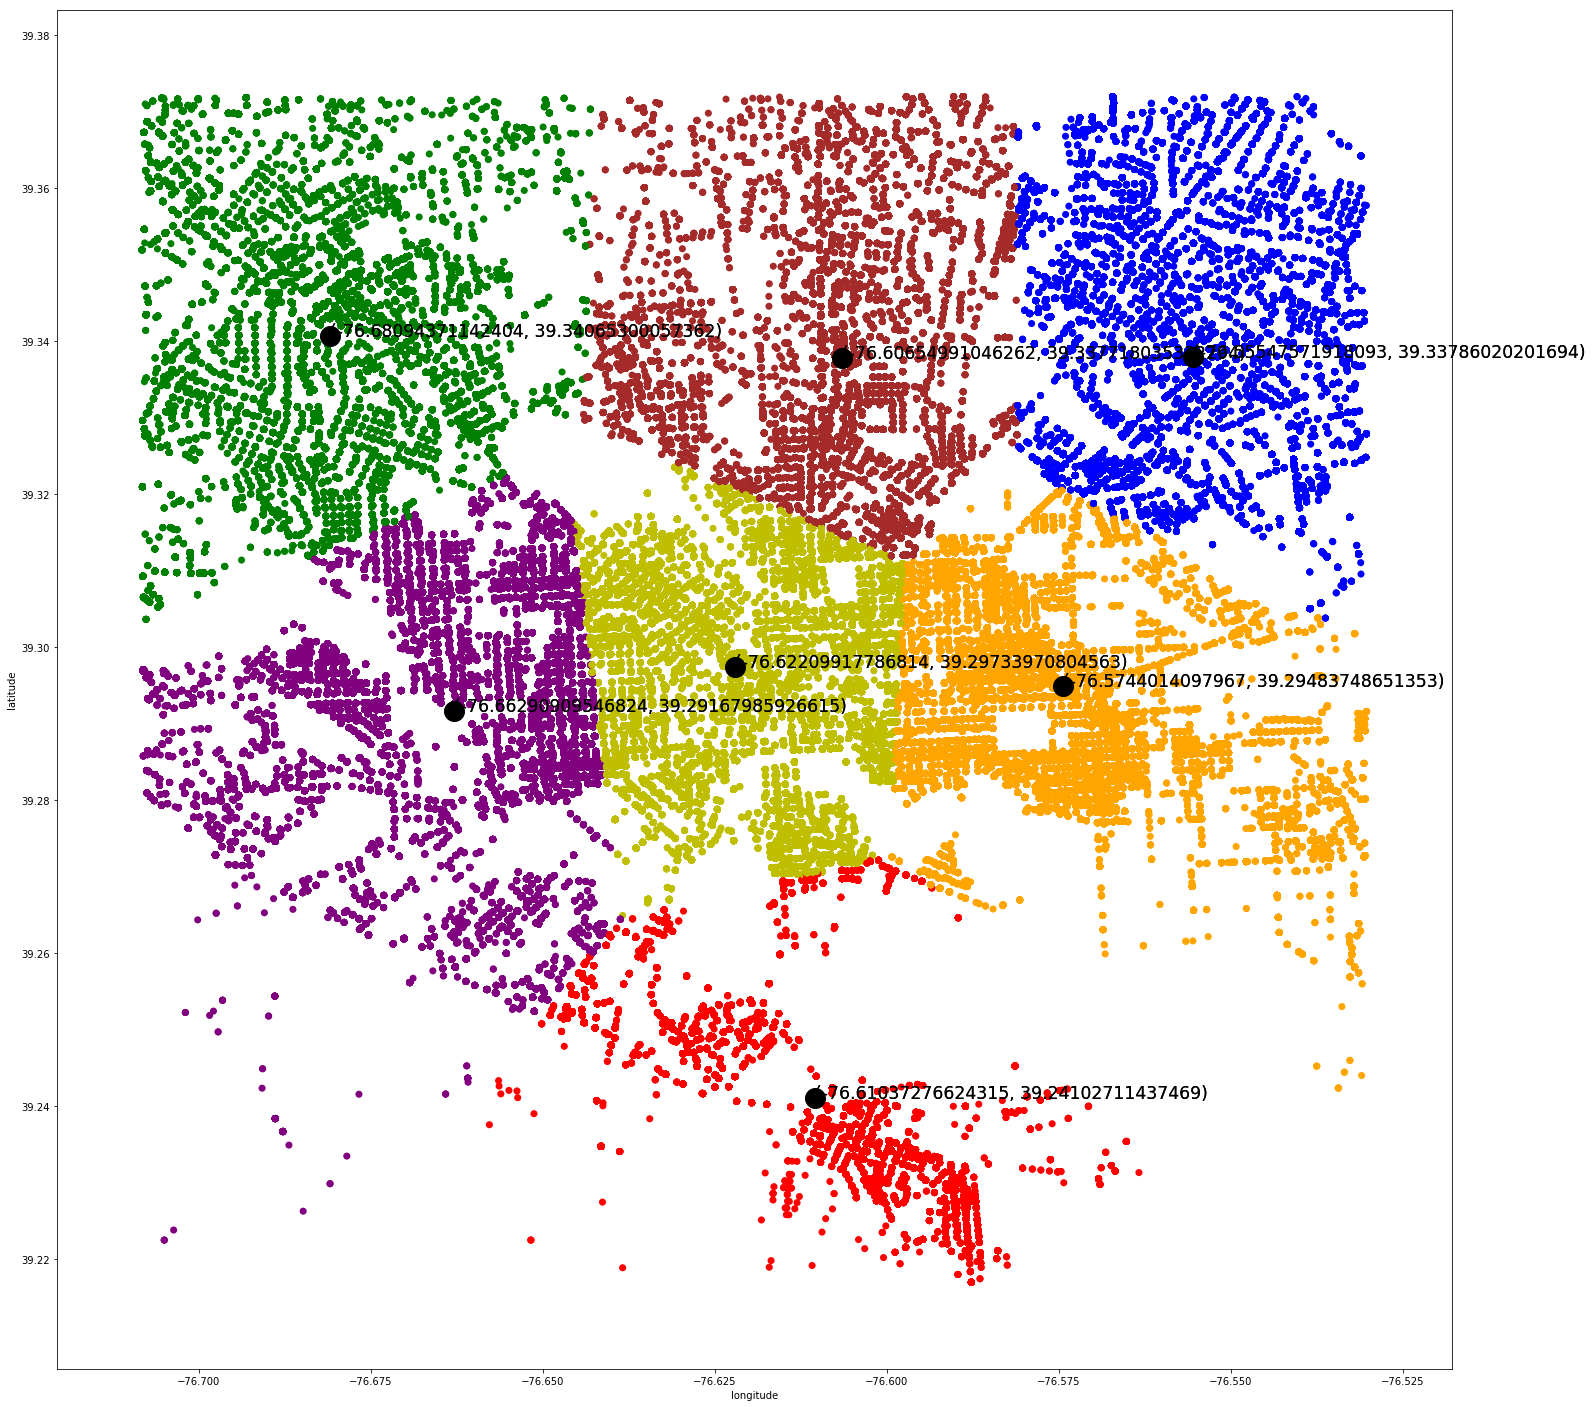

In [112]:
#now adding centers to the plot. 
crimeCenters = km.cluster_centers_
for center in crimeCenters:
    crimePlot.plot(center[1], center[0], "or", color='black', markersize=20)
font0 = FontProperties()
font0.set_size('xx-large')
for centroid in crimeCenters:
    i_x=centroid[1]
    i_y=centroid[0]
    crimePlot.text(i_x,i_y, '({}, {})'.format(i_x, i_y), fontproperties=font0)
crimePlot.figure.set_size_inches(25,25)
crimePlot.figure

In [111]:
#some are not legible so printing out crime centers
print(crimeCenters)

[[ 39.29733971 -76.62209918]
 [ 39.3378602  -76.55547572]
 [ 39.24102711 -76.61037277]
 [ 39.29167986 -76.6629091 ]
 [ 39.340653   -76.68094371]
 [ 39.29483749 -76.57440141]
 [ 39.33771804 -76.60654991]]


In [113]:
print(liquorCenters)

[[ 39.3449069  -76.55664109]
 [ 39.28710618 -76.60741941]
 [ 39.29083983 -76.65031474]
 [ 39.331267   -76.62149688]
 [ 39.34680861 -76.67865845]
 [ 39.23145066 -76.59815542]
 [ 39.28901428 -76.56910979]]


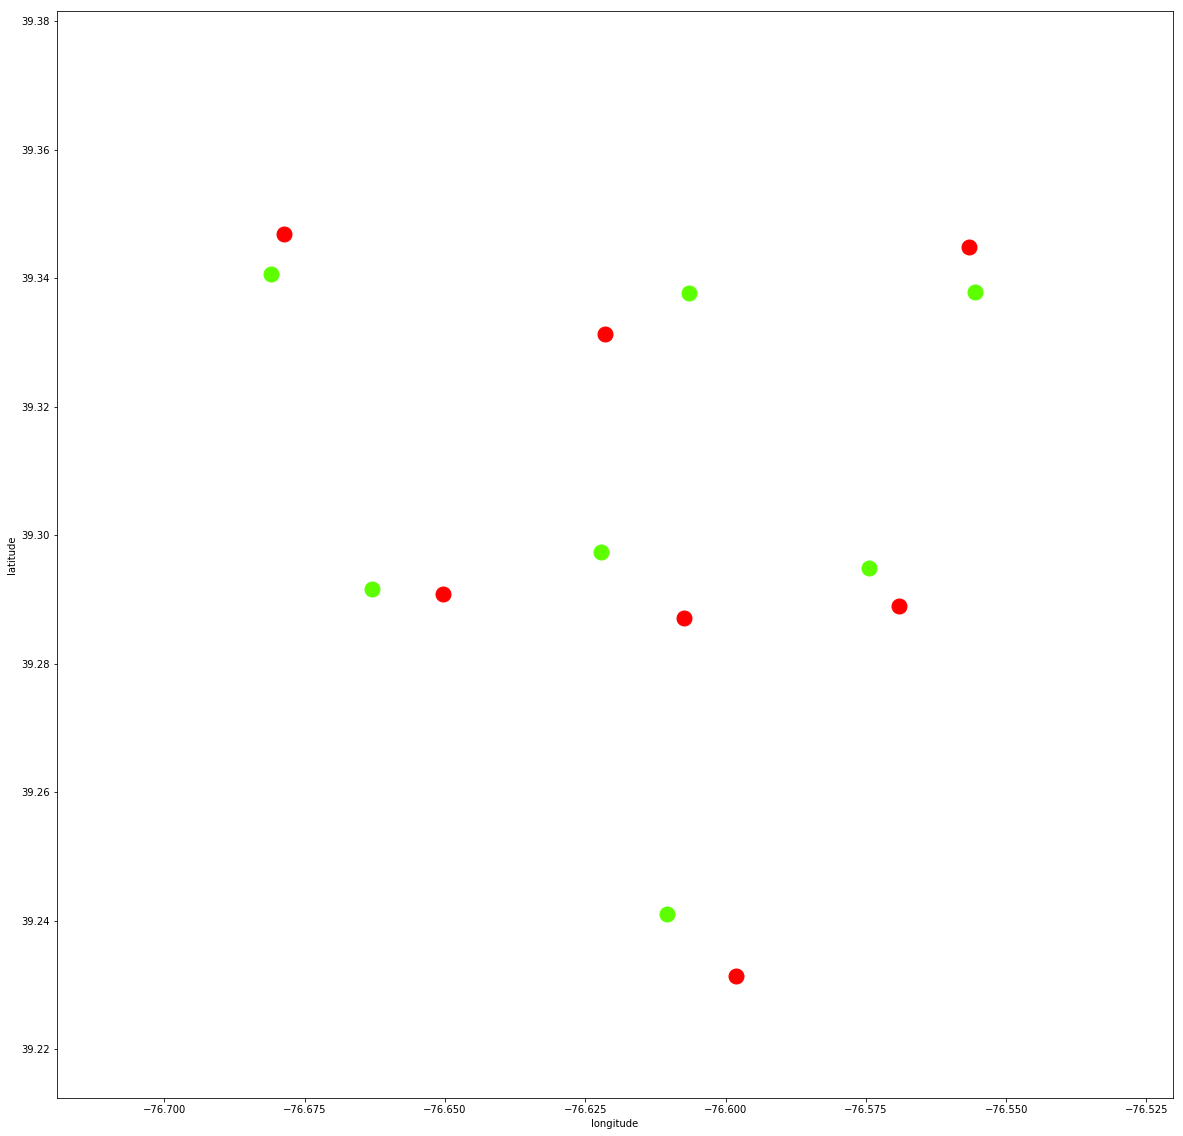

In [114]:
#printing comparison of centers between liquor and all crime data
cplt=CrimeLocs.plot.scatter(x='longitude', y='latitude', c='white',linewidth=0, figsize=(20,20))
for center in crimeCenters:
    cplt.plot(center[1], center[0], "or", color='#5dff00', markersize=15)
for center in liquorCenters:
    cplt.plot(center[1], center[0], "or", color='red', markersize=15)

In [17]:
#was taking too long so using sample this time around
CrimeSample=CrimeDataFixLongLat.sample(frac=0.003, replace=False, random_state=1)

#In hindsight the elbow method did create a smooth curve so checking if silhouette score is a better metric 
#and if clustering is at all possible. Elbow method result was not ideal and clusters are not perfect 
for n_clusters in range(2, 20):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(CrimeSample)
    centers = clusterer.cluster_centers_

    score = silhouette_score(CrimeSample, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.42608462485222937)
For n_clusters = 3, silhouette score is 0.35516786281541524)
For n_clusters = 4, silhouette score is 0.3545938873163102)
For n_clusters = 5, silhouette score is 0.3702810498103058)
For n_clusters = 6, silhouette score is 0.3935495408799846)
For n_clusters = 7, silhouette score is 0.402983941888653)
For n_clusters = 8, silhouette score is 0.39989409542686905)
For n_clusters = 9, silhouette score is 0.40382402846154053)
For n_clusters = 10, silhouette score is 0.4099160603977251)
For n_clusters = 11, silhouette score is 0.40760667730055794)
For n_clusters = 12, silhouette score is 0.409476379228284)
For n_clusters = 13, silhouette score is 0.3964349318682644)
For n_clusters = 14, silhouette score is 0.3957423413666898)
For n_clusters = 15, silhouette score is 0.39170123815738167)
For n_clusters = 16, silhouette score is 0.3793616542591595)
For n_clusters = 17, silhouette score is 0.3880234448624413)
For n_clusters = 18, silhoue

In [26]:
#was taking too long but using slightly larger 3 percent sample this time around. 
#In a perfect world we could do 60 20 20 split but the data set is much too large. 
#Might later choose a sample set for all crime calculations and then do 60 20 20 split with it.
CrimeSampleTwo=CrimeDataFixLongLat.sample(frac=0.03, replace=False, random_state=1)

#In hindsight the elbow method did create a smooth curve so checking if silhouette score is a better metric 
#and if clustering is at all possible. Elbow method result was not ideal and clusters are not perfect 

for n_clusters in range(2, 20):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(CrimeSampleTwo)
    centers = clusterer.cluster_centers_

    score = silhouette_score(CrimeSampleTwo, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.41955672205524513)
For n_clusters = 3, silhouette score is 0.35621204157637626)
For n_clusters = 4, silhouette score is 0.35470083280782627)
For n_clusters = 5, silhouette score is 0.36885838902594603)
For n_clusters = 6, silhouette score is 0.38766355934125446)
For n_clusters = 7, silhouette score is 0.3976904541128701)
For n_clusters = 8, silhouette score is 0.39508228696959274)
For n_clusters = 9, silhouette score is 0.4053898733041533)
For n_clusters = 10, silhouette score is 0.3986938836878982)
For n_clusters = 11, silhouette score is 0.4125778903033051)
For n_clusters = 12, silhouette score is 0.4129409271364136)
For n_clusters = 13, silhouette score is 0.39790765354772883)
For n_clusters = 14, silhouette score is 0.40251187326675325)
For n_clusters = 15, silhouette score is 0.4016294903875933)
For n_clusters = 16, silhouette score is 0.4039624228817534)
For n_clusters = 17, silhouette score is 0.3985568698291423)
For n_clusters = 18, sil

In [27]:
#since 2 clusters doesn't make sense for our purposes 
#it looks like 12 might be the next best value. Going to try that on the entire crime data set.

# Using sklearn
matrix = CrimeDataFixLongLat.values
km = KMeans(n_clusters=12)
km.fit(matrix)
# Get cluster assignment labels
labels = km.labels_
# Format results as a DataFrame
results = pd.DataFrame([CrimeDataFixLongLat.index,labels]).T
results[1].value_counts()

#Printing the amount of crime in each cluster

11    84782
1     83751
5     78512
7     77818
3     70654
10    65476
6     61679
0     42951
9     41463
2     32504
4     29859
8     25853
Name: 1, dtype: int64

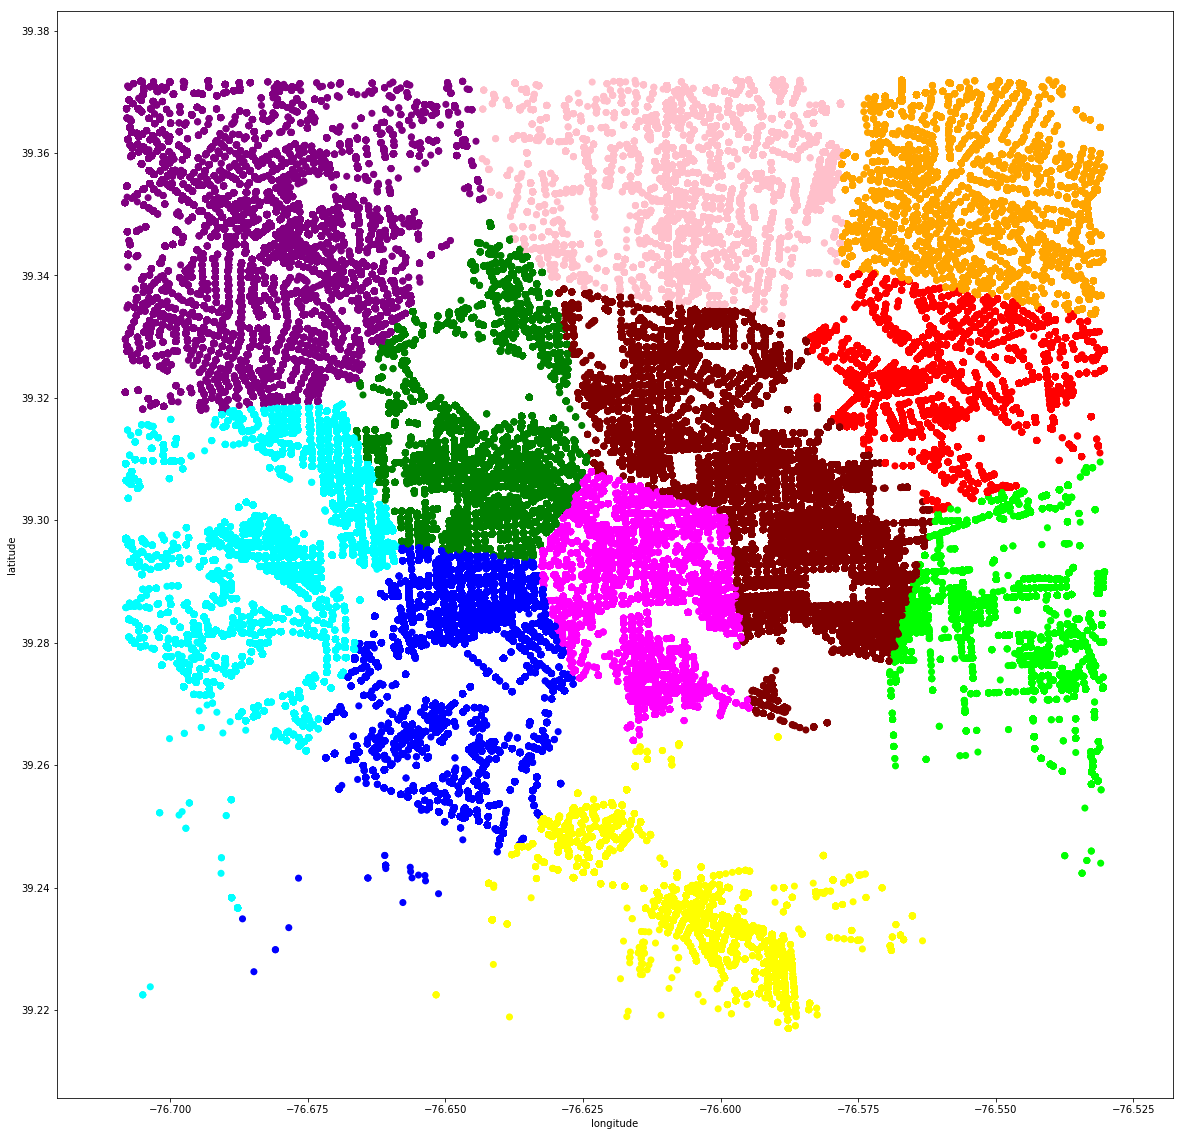

In [29]:
res=results[1]

#coloring with 12 colors
#this is the order of colors assigned to cluster values from 0 to 11:
#red, green, yellow, blue, orange, purple, cyan, magenta, lime, pink, brown, maroon  
#using this website as color resource https://sashat.me/2017/01/11/list-of-20-simple-distinct-colors/
col = np.where(res==0,'red',np.where(res==1,'green',np.where(res==2,'yellow',
np.where(res==3,'blue',np.where(res==4,'orange',np.where(res==5,'purple',
np.where(res==6,'cyan',np.where(res==7,'magenta',np.where(res==8,'lime',np.where(res==9,'pink',
np.where(res==5,'brown','maroon')))))))))))

crimePlot= CrimeDataFixLongLat.plot.scatter(x='longitude', y='latitude', c=col, s=50, linewidth=0, figsize=(20,20))

In [ ]:
#results are not necessarily great because 
#it doesn't necessarily make sense to look at 3 percent of the data to decide how many clusters are used for all of the data

#I'll try just using random sampling to get a smaller crime set and use this small random sample 
#set for both determining k/training and clustering. Seems like approximately 20-30 k crimes worked just fine with fit predict.

#the sample should be 50 k entries. Then, 60 percent of it will be used for finding k via silhouette and k-means. 
# Once that k value is found the other 40 percent of the sample will be clustered and graphed with 20 k entries. 
#we will then look at their silhouette score and other metrics to see if the prediction was relatively ok.

#I think it's also worthwhile to train liquor establishments in a similar way. 
#though I have many ideas other stuffon what we could do to find a good k value or better clusters

#we should also categorize by specific crimes and look at 50 k of one or another kind of crime to see if there are crime 
#clusters.

#lastly, we can frankly just use the liquor clusters to get liquor zones then place crimes in each cluster using predict 
#and see the ratio of liquor to crimes per each cluster. Maybe this will show us something about which regions of baltimore 
#has the most crime/liquor whether or not they happen to have the most crime. 

#maybe focusing on clustering crime is not the best way to figure all of this out. Crime happens all over the place. 